In [89]:
#importing required libraries
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score


In [20]:
df=pd.read_csv('C:/Users/ankush.parkhad/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/weatherAUS.csv')

In [21]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [22]:
#displaying top rows of datframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
#displaying bottom 5 rows of dataframe
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [24]:
#displaying random 3 rows of dataframe
df.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8358,2012-10-14,Darwin,23.4,36.2,0.0,9.6,11.0,NNW,37.0,S,N,9.0,20.0,55.0,31.0,1015.3,1011.1,5.0,6.0,29.5,32.6,No,No
5290,2011-12-14,Melbourne,13.7,20.2,0.0,6.4,8.2,SSE,43.0,SE,S,26.0,19.0,43.0,45.0,1018.6,1018.0,7.0,3.0,15.4,17.6,No,No
5458,2010-02-09,Melbourne,19.3,32.1,0.0,10.0,8.8,N,54.0,N,SSE,39.0,20.0,58.0,53.0,1019.5,1017.8,2.0,5.0,25.5,29.5,No,No


In [25]:
#checking no. of rows and columns
df.shape

(8425, 23)

Our dataset has 8425 rows and 23 columns

In [26]:
#getting information about our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

The datatypes of our columns are float and object. As we can see above there are a lot of null values present in our column, so lets check first how many null data our dataset have.

In [27]:
#checking null values
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Every column has a lot of null values excluding date and location(these two columns dont have any null values)

In [16]:
round(df.isnull().sum()/df.shape[0]*100,2)

Date              0.00
Location          0.00
MinTemp           0.89
MaxTemp           0.71
Rainfall          2.85
Evaporation      41.69
Sunshine         47.41
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
WindSpeed9am      0.90
WindSpeed3pm      1.27
Humidity9am       0.70
Humidity3pm       1.21
Pressure9am      15.54
Pressure3pm      15.57
Cloud9am         28.74
Cloud3pm         29.14
Temp9am           0.66
Temp3pm           1.14
RainToday         2.85
RainTomorrow      2.84
dtype: float64

In [28]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [29]:
# checking values are converted in 0 and 1 or not 
print(df.RainToday)


0       No
1       No
2       No
3       No
4       No
        ..
8420    No
8421    No
8422    No
8423    No
8424    No
Name: RainToday, Length: 8425, dtype: object


In [30]:
# checking values are converted in 0 and 1 or not 
print(df.RainTomorrow)

0        No
1        No
2        No
3        No
4        No
       ... 
8420     No
8421     No
8422     No
8423     No
8424    NaN
Name: RainTomorrow, Length: 8425, dtype: object


## Analysing numerical columns

In [31]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print(numerical_feature)

Numerical Features Count 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [32]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 2
Continuous feature Count 14


In [33]:
print(discrete_feature )
print('\n')
print(continuous_feature )

['Cloud9am', 'Cloud3pm']


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [34]:
# filling the null value for numerical variables
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [35]:
#Filling the missing values for categorical variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [36]:
#Again checking the null values
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Here we can see, there are no null values present in our dataset now

### Analyzing categorical columns

In [37]:

categorical_col = ['RainToday', 'WindDir9am','WindGustDir','Location', 'WindDir3pm','RainTomorrow']

In [38]:
df['Location'].nunique()

12

In [39]:
for i in categorical_col:
    print(i)
    print(df[i].value_counts())

    print('\n')

RainToday
No     6435
Yes    1990
Name: RainToday, dtype: int64


WindDir9am
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


WindGustDir
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


WindDir3pm
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
S

In [40]:
df.groupby('Location')['MaxTemp'].max()

Location
Adelaide        25.6
Albury          28.3
Brisbane        25.0
CoffsHarbour    24.2
Darwin          27.5
Melbourne       25.5
Newcastle       22.9
Penrith         22.3
PerthAirport    28.5
Uluru           14.9
Williamtown     26.1
Wollongong      22.8
Name: MaxTemp, dtype: float64

In [41]:
# Group your dataframe by location and find out the averages of all numeric values.
df.groupby('Location').mean()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,,,,,,,,,,,,,,,,
Adelaide,10.980000,10.980000,1.435237,5.121671,7.632205,37.990244,11.317073,16.404878,59.029268,44.809756,1020.091220,1018.074634,4.566622,4.503183,15.861951,20.189756
Albury,10.062587,10.062587,2.129055,5.389395,7.632205,33.933951,8.248669,14.297245,72.604190,47.062845,1017.581477,1014.981477,5.285971,4.837624,14.555347,21.673539
Brisbane,15.369073,15.369073,3.109896,4.875629,7.918155,26.456341,6.031088,9.685781,66.474650,54.182210,1018.123661,1015.031731,3.694301,3.898969,20.685427,23.976141
CoffsHarbour,13.704244,13.704244,5.434707,3.700885,7.332570,38.872438,15.389027,20.512385,66.314239,60.648527,1018.587693,1016.097781,3.816694,4.116213,19.611620,21.745733
Darwin,21.324800,21.324800,2.735200,6.349558,9.389200,39.288000,16.012000,20.204000,63.828000,43.932000,1013.373200,1009.524800,3.800000,3.580000,25.601200,30.668000
Melbourne,12.443280,12.443280,2.313878,4.529963,6.419399,45.779558,19.709001,22.697904,66.754405,51.245992,1017.845623,1016.075260,5.155148,5.127789,15.332999,19.952457
Newcastle,12.937727,12.937727,3.029054,5.389395,7.632205,40.174469,5.694822,12.746831,73.754842,55.915732,1017.640233,1015.236075,4.064556,4.348869,17.433322,22.324634
Penrith,11.279668,11.279668,2.361448,5.389395,7.632205,31.413225,5.626556,11.024896,72.863071,45.481328,1017.640233,1015.236075,4.566622,4.503183,15.533195,22.135270
PerthAirport,13.172674,13.172674,1.916279,5.784460,8.797117,44.797063,18.043189,21.353821,58.833887,42.131229,1017.082508,1014.548173,3.449336,3.559801,19.330648,24.472176


### Data visualization

In [42]:

#Checking the target column
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

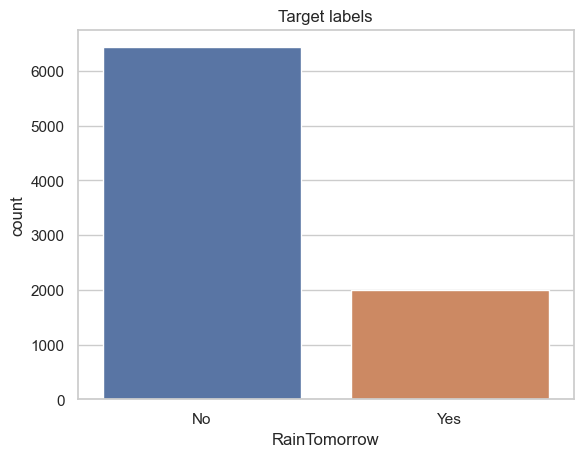

In [43]:
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()



From above plot it is clear that data set is imbalanced. We will do SMOTE analysis later.

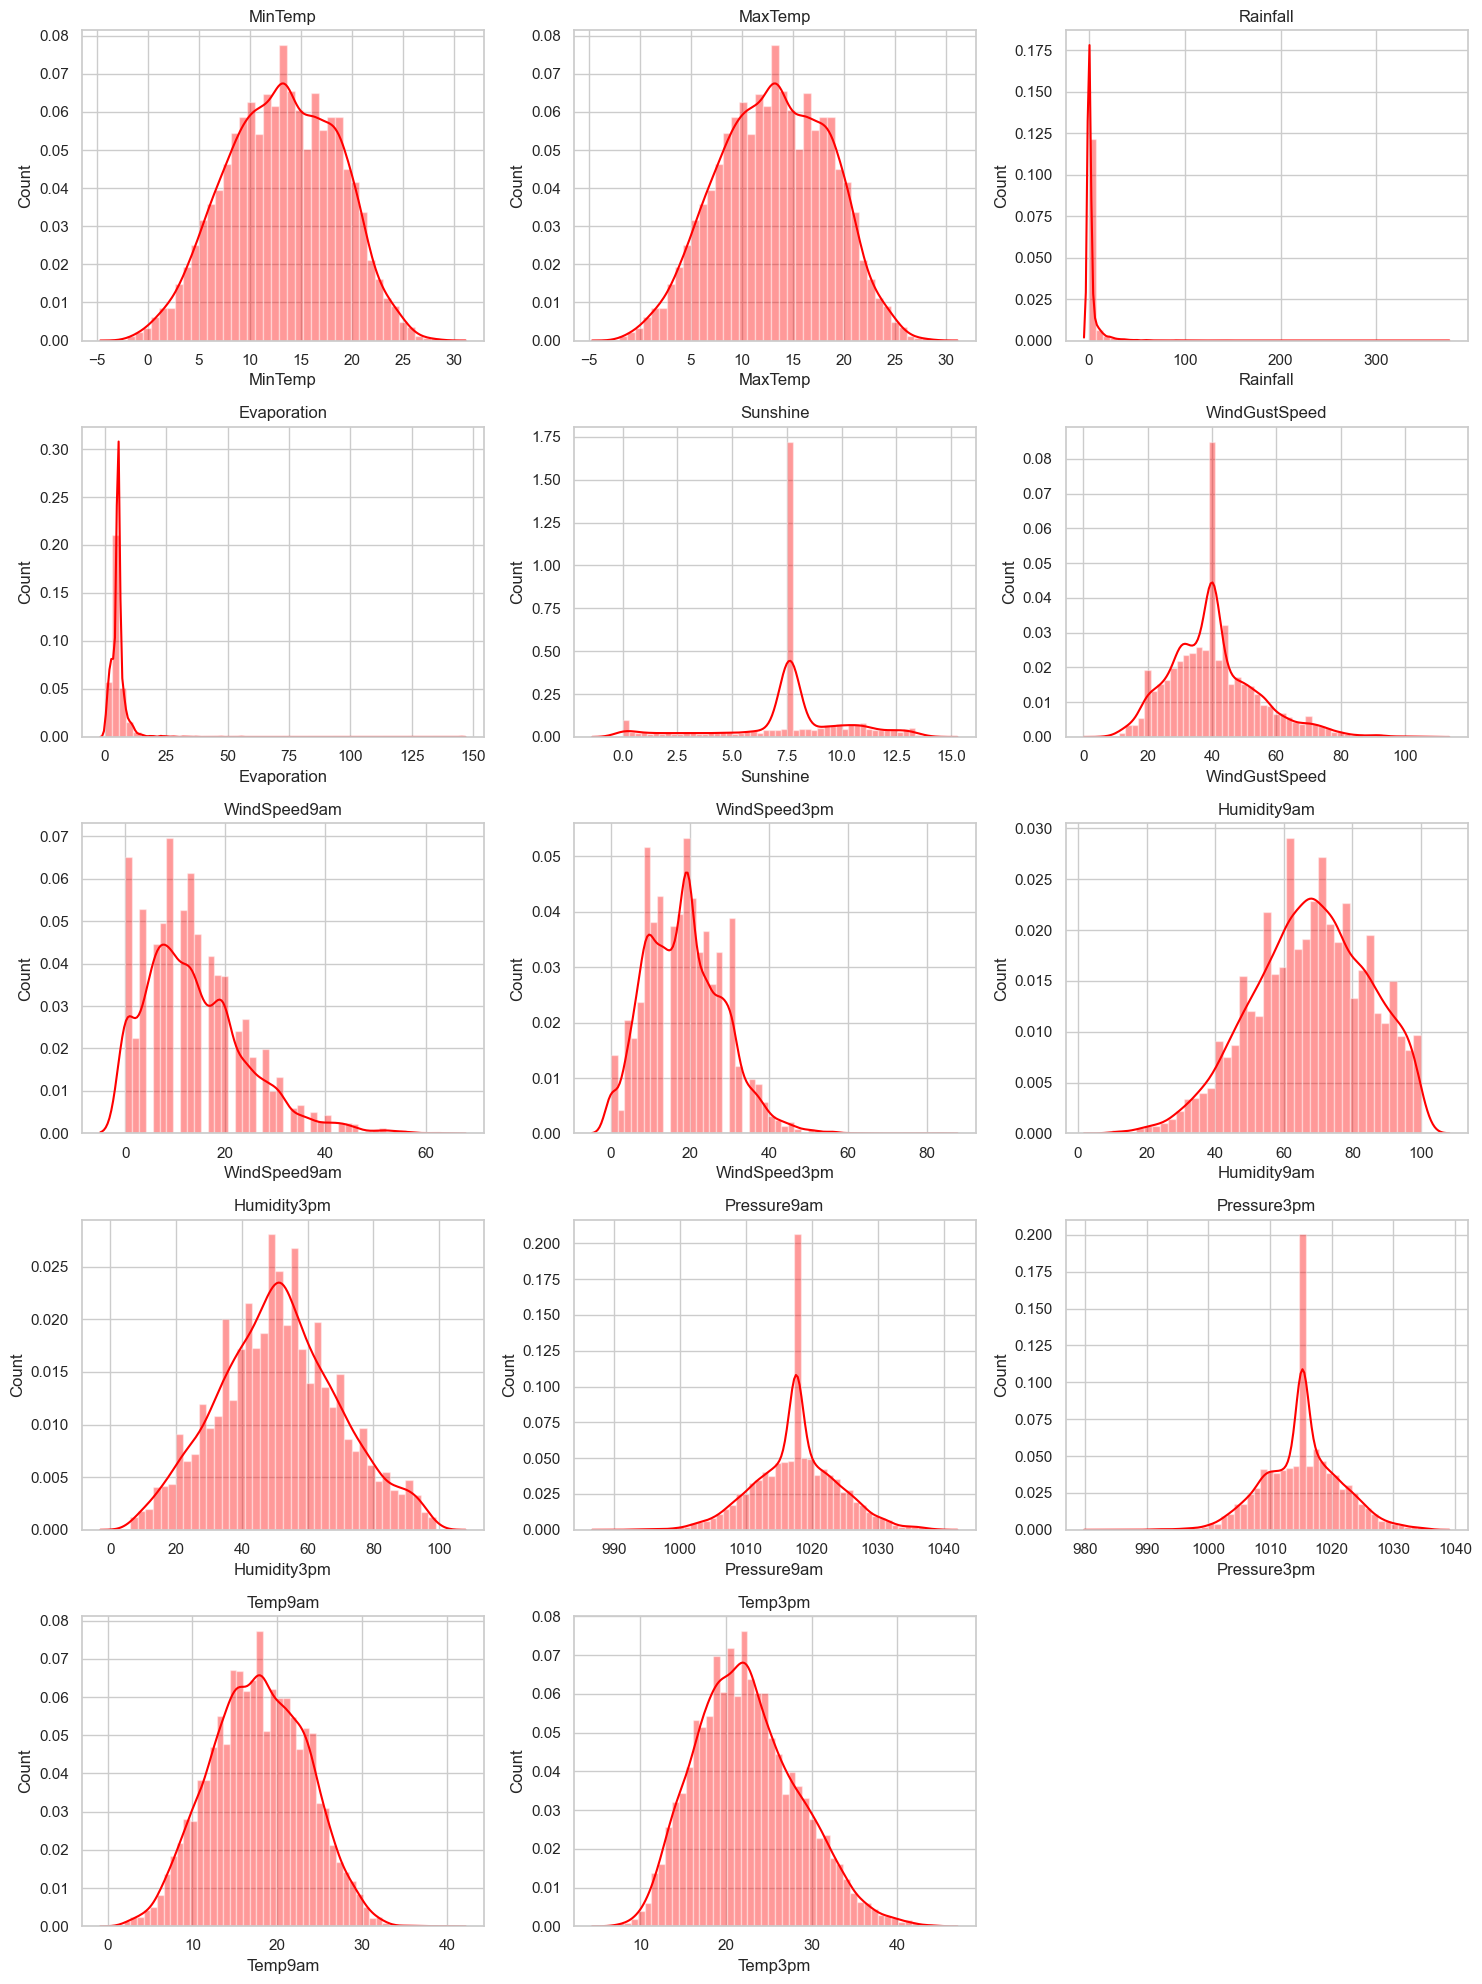

In [44]:
plt.figure(figsize=(15,20))
for i,feature in enumerate(continuous_feature):
    data=df.copy()
    plt.subplot(5,3,i+1)
    sns.distplot(df[feature],color='red')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
plt.tight_layout()    
plt.show()

Here from the distribution plot we can see most of the columns like mintemp, maxtemp, sunshine, windgustspeed, humidity9am, humidity3pm, pressure9am, pressure3pm, Temp9am and Temp3pm.

So the data is not much skewed. It is safe to proceed

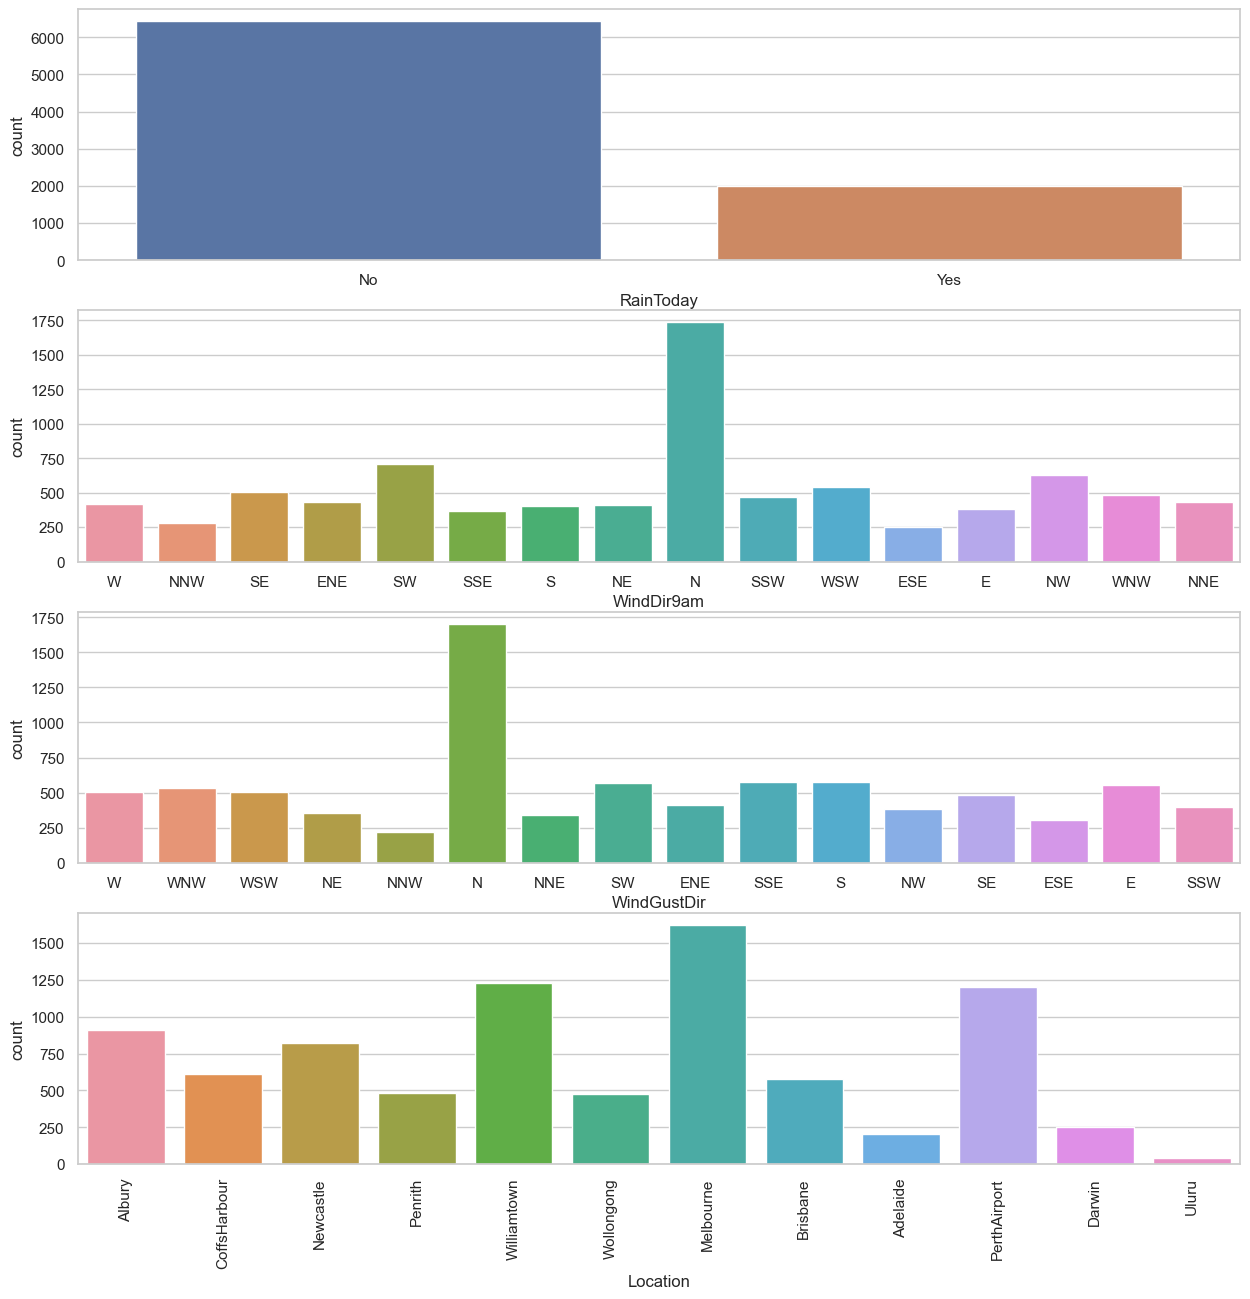

In [45]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir','Location', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

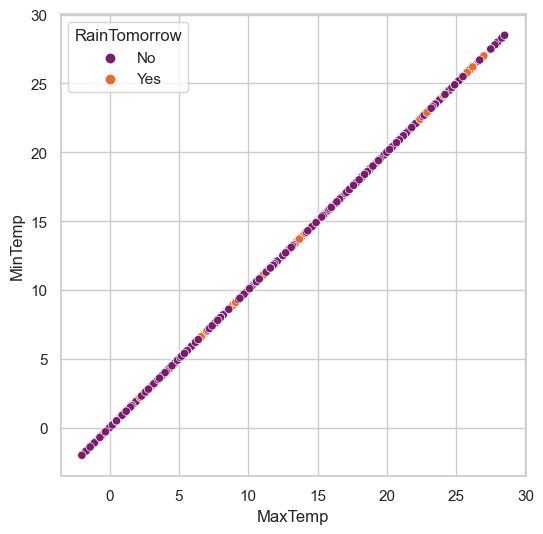

In [46]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='MaxTemp' , y='MinTemp', hue='RainTomorrow', palette='inferno', data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

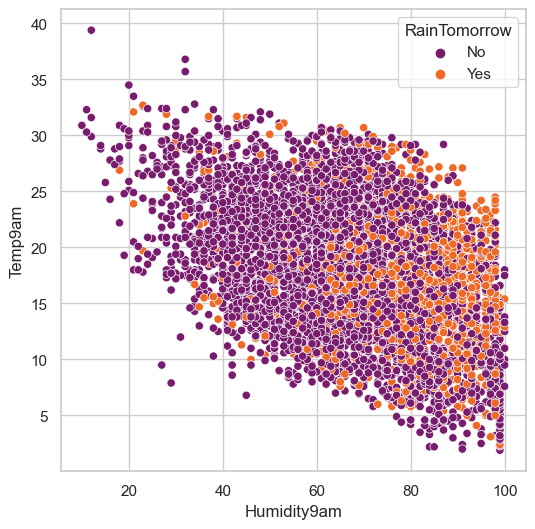

In [47]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Humidity9am' , y='Temp9am', hue='RainTomorrow', palette='inferno', data=df)

In [48]:
# Converting Date column to date, months and years
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

In [49]:
#adding new column day,month, year in dataframe with dt attribute
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

#Droping ['Date'] column
df.drop('Date',axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,13.4,0.6,5.389395,7.632205,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,7.4,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,12.9,0.0,5.389395,7.632205,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,9.2,0.0,5.389395,7.632205,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,17.5,1.0,5.389395,7.632205,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [50]:
df['Year'].value_counts()

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: Year, dtype: int64

In [51]:
df['Month'].value_counts()

6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: Month, dtype: int64

In [52]:

# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [53]:
df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
MinTemp,1.000000,1.000000,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,1.000000,1.000000,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
Rainfall,0.087684,0.087684,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.254965,0.254965,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.056184,0.056184,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustSpeed,0.230058,0.230058,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindSpeed9am,0.136872,0.136872,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,-0.000549,0.058198,0.109798,-0.002606,0.035531,0.068285,-0.003067,0.038427,-0.088489
WindSpeed3pm,0.178349,0.178349,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.005061,0.003295,0.184188,0.066087,0.015268,0.053568,-0.008957,0.049483,-0.051466
Humidity9am,-0.130731,-0.130731,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,0.404742,0.296862,-0.378344,-0.382401,0.374007,0.271222,0.003799,-0.115530,0.099717
Humidity3pm,0.079048,0.079048,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,0.424348,0.439965,-0.130414,-0.491485,0.359219,0.444808,0.012512,-0.074256,-0.028920


<AxesSubplot:>

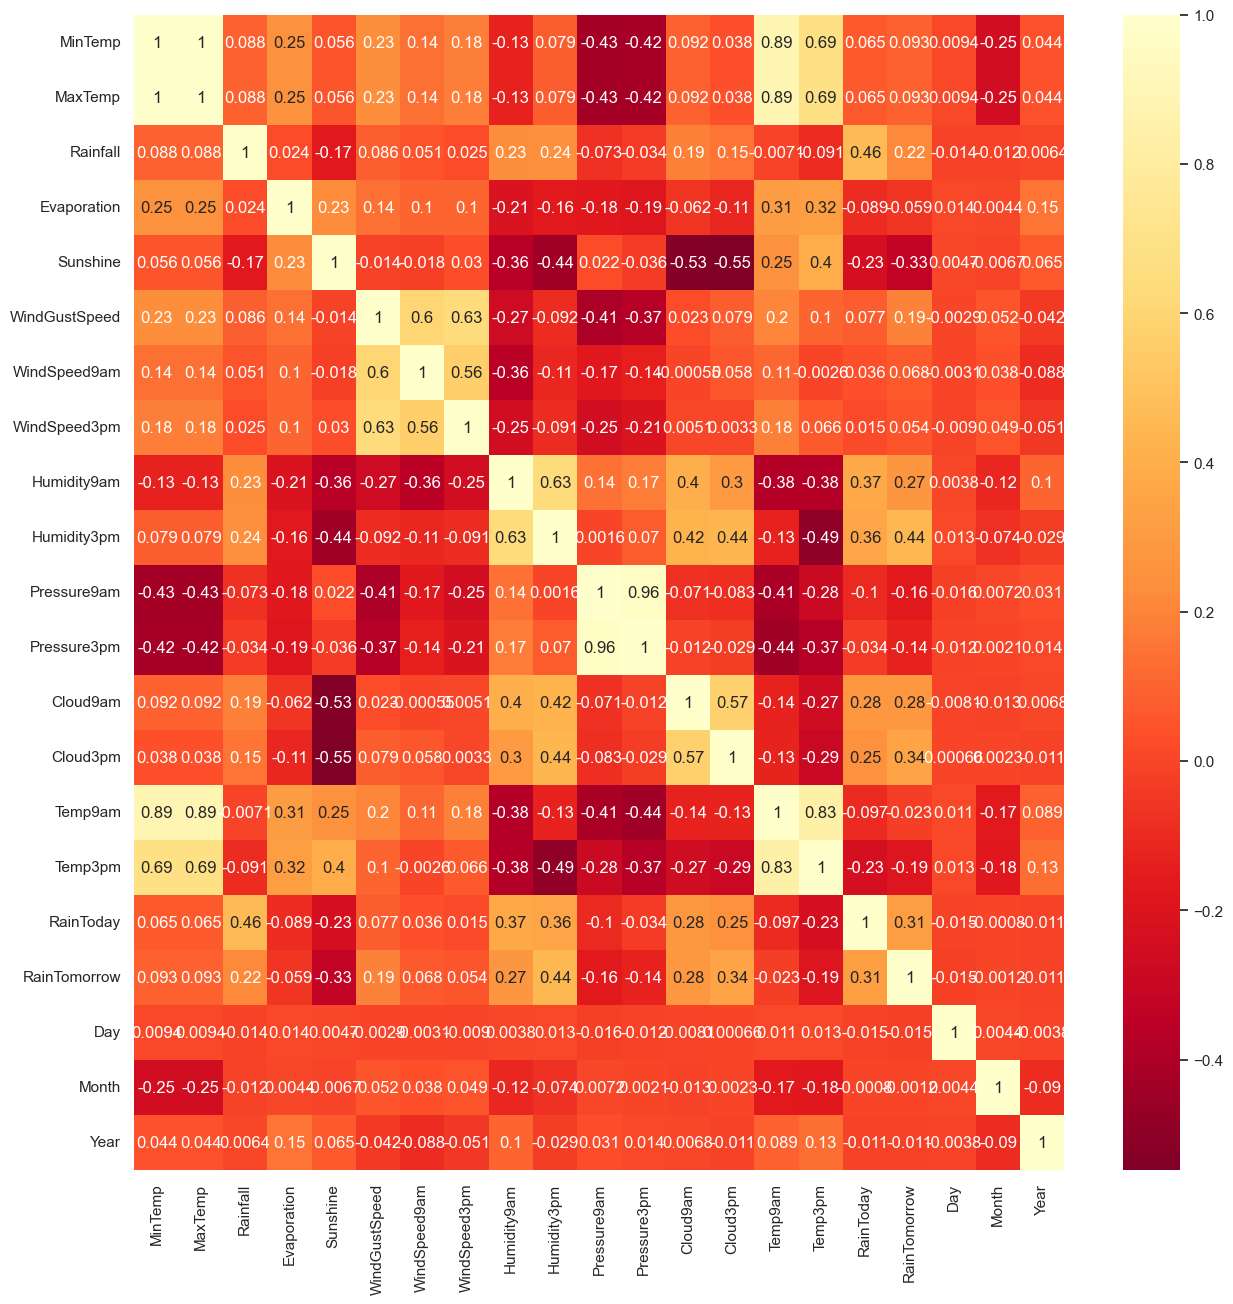

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

There is some multicollinearity among the columns. So we will apply VIF

			BOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM


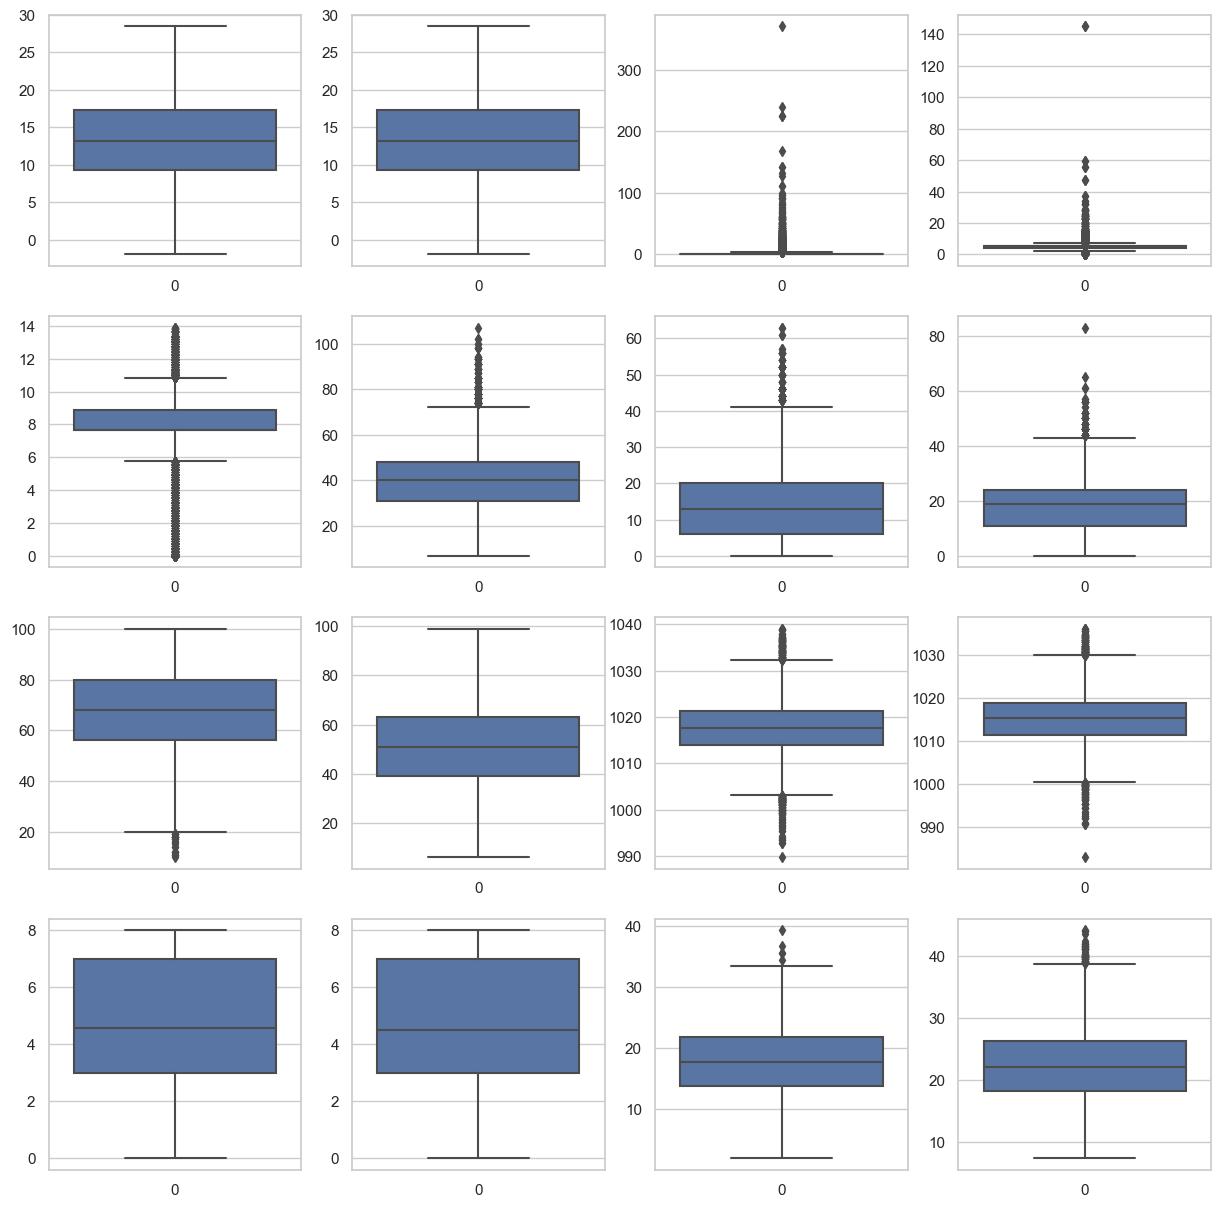

In [56]:
# Checking outliers in Numerical columns

n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT fOR NUMERICAL BEFORE REMOVING OUTLIERS FROM THEM')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
    
plt.show()

In [57]:
# Removing Outliers from Numerical Columns
def removeOutliers(numerical_feature):
    global df
    for i in range(len(numerical_feature)):
        q1 = df[numerical_feature[i]].quantile(0.25)
        q3 = df[numerical_feature[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR        
        df.loc[(df[numerical_feature[i]] <= minimum), numerical_feature[i]] = minimum
        df.loc[(df[numerical_feature[i]] >= maximum), numerical_feature[i]] = maximum 

removeOutliers(numerical_feature)

			BOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:


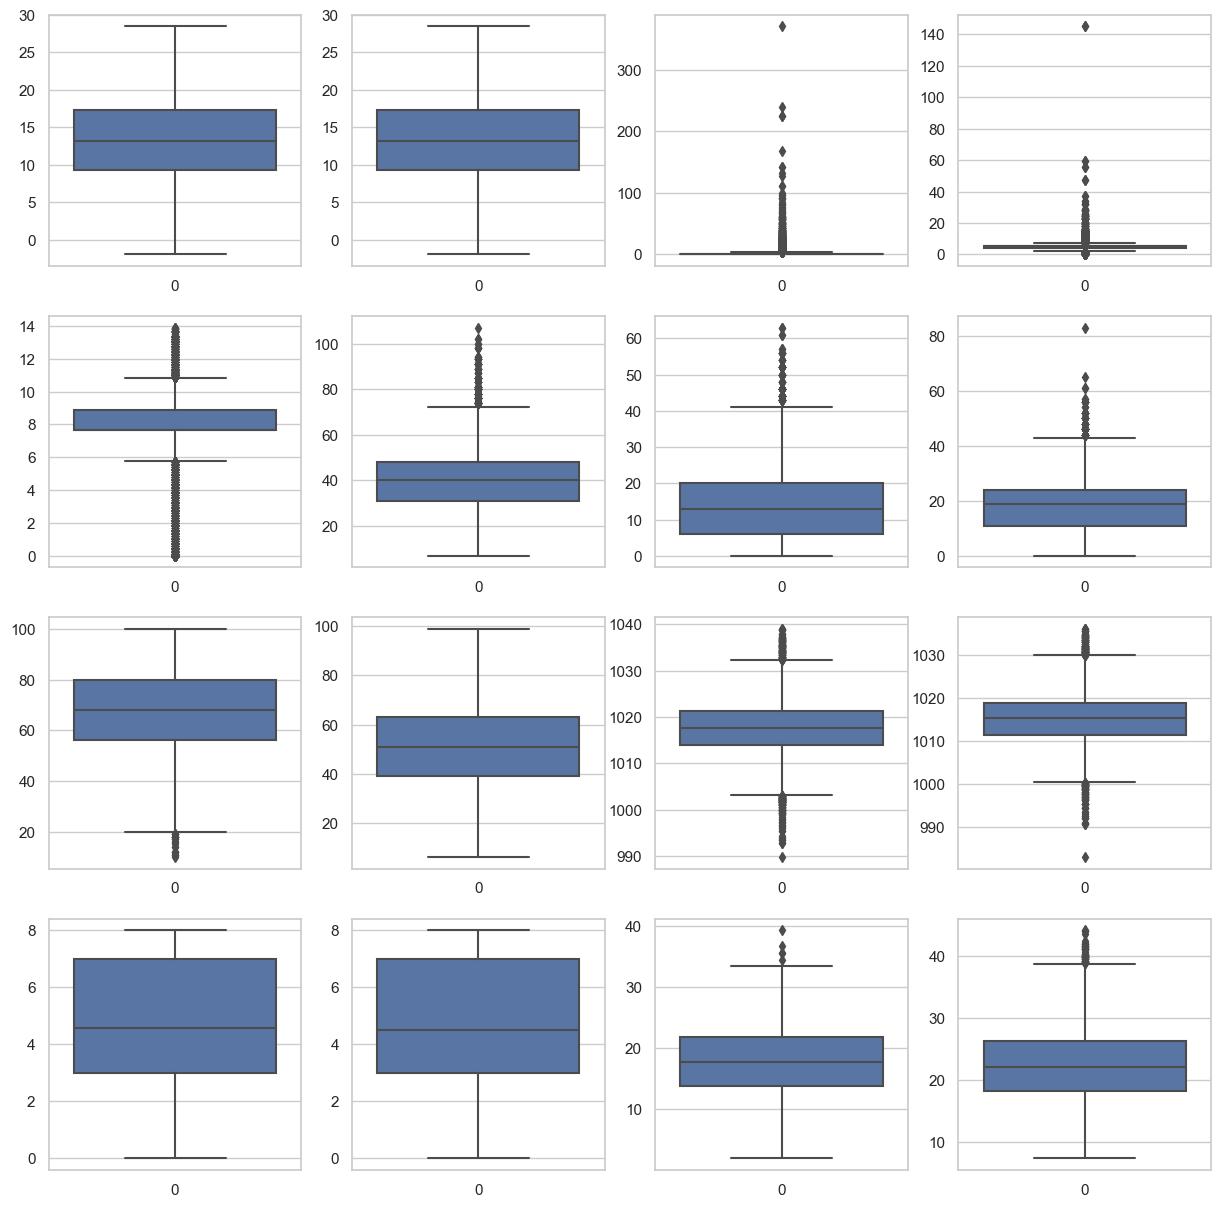

In [58]:
n_rows = 4
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15,15))
print('\t\t\tBOXPLOT FOR NUMERICAL COLUMNS AFTER REMOVING OUTLIERS FORM THEM:')
i=0;j=0;k=0;
while i<n_rows:
    while j<n_cols:
        sns.boxplot(data=df[numerical_feature[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [60]:
    # Converting categorical columns using label encoder
from sklearn.preprocessing import LabelEncoder
WindGustDir_encode = LabelEncoder()
df['Location']=WindGustDir_encode.fit_transform(df['Location'])

WindGustDir_encode = LabelEncoder()
df['WindGustDir']=WindGustDir_encode.fit_transform(df['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df['WindDir9am']=WindDir9am_encode.fit_transform(df['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df['WindDir3pm']=WindDir3pm_encode.fit_transform(df['WindDir3pm'])

In [61]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [62]:
# Applying SMOTE to correct imbalance in target

x=df.drop('RainTomorrow', axis=1)
y=df["RainTomorrow"]
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int64

In [66]:
#Balancing data by applying SMOTE.
!pip install -U imbalanced-learn


     -------------------------------------- 226.0/226.0 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
(12868, 24)
(12868,)


In [67]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(x,y)
print(sm_x.shape)
print(sm_y.shape)

(12868, 24)
(12868,)


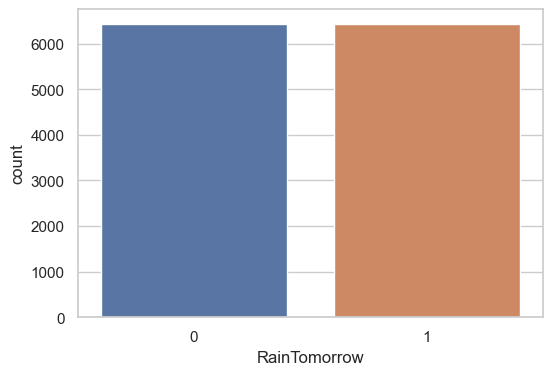

0    6434
1    6434
Name: RainTomorrow, dtype: int64


In [68]:
plt.figure(figsize=(6,4))
sns.countplot(sm_y)
plt.show()
print(sm_y.value_counts())

Since there is a lot of multicollinearity among few columns and its difficult to drop column through vif. So applying PCA to drop less important column.

In [69]:
# Applying PCA to reduce multicollinearity
from sklearn.decomposition import PCA

In [70]:
# Creating instance of class to identify number of components for cumulative variance of 95%
pca = PCA(0.90)

In [71]:
X_pca=pca.fit_transform(sm_x)
X_pca.shape

(12868, 8)

In [72]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_pca.transpose())
corrmat.shape


(8, 8)

<AxesSubplot:>

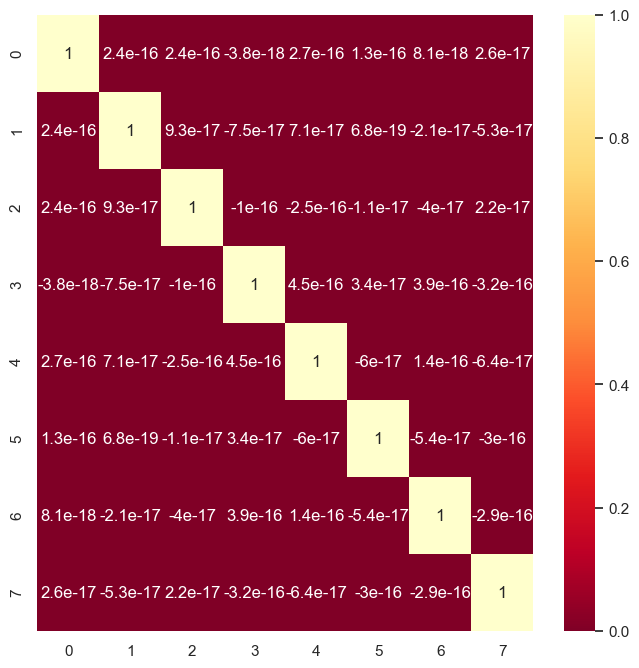

In [73]:
# Plotting heatmap to oserve the correlation between features
plt.figure(figsize=[8,8])
sns.heatmap(corrmat,cmap='YlOrRd_r', annot=True)

In [74]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_pca=scale.fit_transform(X_pca)
X_pca

array([[-1.11918423, -0.18199529,  0.88099556, ..., -1.62275819,
        -0.75128356,  2.37568873],
       [-1.61835026, -0.55177182,  0.36001699, ..., -1.26136649,
        -2.54460484,  0.93484227],
       [-1.75496596,  0.12847564,  0.00679957, ..., -1.20037171,
        -1.53344075,  1.80142265],
       ...,
       [ 1.30645568,  0.71082469, -0.82450489, ..., -1.00814444,
        -2.0353518 , -0.64768264],
       [ 1.8753209 , -0.25363004,  0.86806181, ..., -1.17605688,
        -0.37057065,  0.97498659],
       [-0.29616211,  0.00662575, -0.2315351 , ...,  0.7172899 ,
         1.1096248 , -0.02185903]])

In [76]:
# Finding Best Random State

maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_pca,sm_y,random_state=i,test_size=0.30)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.7668997668997669 on Random State 67


In [77]:

x_train,x_test,y_train,y_test=train_test_split(X_pca,sm_y,test_size=.30,random_state=maxRS)

In [78]:

# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(9007, 8) 	 (3861, 8)


In [79]:
print(y_train.shape,'\t',y_test.shape)

(9007,) 	 (3861,)


In [80]:
# Checking with different algorithms

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Train score",m.score(x_train,y_train))
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Train score 0.7461974020206507
Accuracy score of LogisticRegression() is:
0.7668997668997669
[[1521  384]
 [ 516 1440]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1905
           1       0.79      0.74      0.76      1956

    accuracy                           0.77      3861
   macro avg       0.77      0.77      0.77      3861
weighted avg       0.77      0.77      0.77      3861



Train score 0.7187742866659265
Accuracy score of GaussianNB() is:
0.7285677285677286
[[1682  223]
 [ 825 1131]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1905
           1       0.84      0.58      0.68      1956

    accuracy                           0.73      3861
   macro avg       0.75      0.73      0.72      3861
weighted avg       0.75      0.73      0.72      3861



Train score 0.79826801376707
Accuracy score of SVC() is:
0.8018648018648019
[[1576  329]
 [ 436 1520]]
       

In [81]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=170,criterion='gini')
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)
print("Train score",rfc.score(x_train,y_train))
print("Test score",accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Train score 1.0
Test score 0.9132349132349132
[[1755  150]
 [ 185 1771]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1905
           1       0.92      0.91      0.91      1956

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861



In [82]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x_train,y_train)

# Prediction
predGBc = GBc.predict(x_test)
print("Train score",GBc.score(x_train,y_train))
print("Test score",accuracy_score(y_test, predGBc))
print(confusion_matrix(y_test, predGBc))
print(classification_report(y_test,predGBc))


Train score 0.7884978350172088
Test score 0.7816627816627817
[[1545  360]
 [ 483 1473]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1905
           1       0.80      0.75      0.78      1956

    accuracy                           0.78      3861
   macro avg       0.78      0.78      0.78      3861
weighted avg       0.78      0.78      0.78      3861




Here train score and test score both are having good accoracy and the variance between train and test score is almost nil. So we can Select this model.

Let's do some hyperparameter tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

grid = RandomizedSearchCV(GBc, para, scoring= "accuracy",cv = 5, n_iter=50,n_jobs=-1,verbose=2)

grid.fit(x_train,y_train)
print("Train score",grid.score(x_train,y_train))
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train score 1.0
score 0.8789820798779319
best parameter {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.3}
best estimator GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=400)


Here also after hypertuning, train score is 1 and train score and test score variance is high. This is a case of overfitting when hypertuning is done.

so we will select GradiantBoostingClassifier as our final model.

In [84]:

best_parameter_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=10, n_estimators=400)
for i in range(2,7):
    cv = cross_val_score(GBc,X_pca,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.7185265775567299 and the SD is 0.02113770593720854
at CV 3 The mean is  0.7195384988576875 and the SD is 0.0404415157562572
at CV 4 The mean is  0.738265464718682 and the SD is 0.03775051366354664
at CV 5 The mean is  0.7473638897268902 and the SD is 0.04822648716255869
at CV 6 The mean is  0.7308159088009836 and the SD is 0.061328679360533406


In [86]:
# Cross validate of RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBc,X_pca,sm_y,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Score: [0.77544678 0.70823621 0.68026418 0.75709289 0.8161679 ]
Mean Score: 0.7474415898045901
Standard Deviation: 0.04827133647448499


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.4s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished


In [87]:
RainTomorrow =GradientBoostingClassifier(learning_rate=0.5, max_depth=10, n_estimators=400)
RainTomorrow.fit(x_train, y_train)
pred = RainTomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.87308987308987


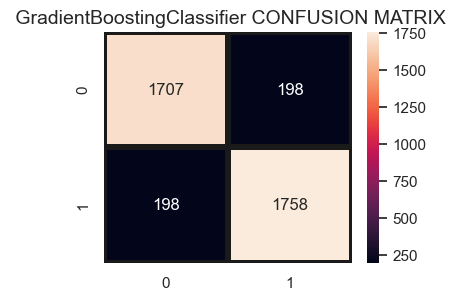

In [88]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, grid_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GradientBoostingClassifier CONFUSION MATRIX",fontsize=14)
plt.show()

#### Plotting AUC ROC Curve

In [91]:

GBc.fit(x_train,y_train)

GradientBoostingClassifier()

In [92]:
y_pred_prob=GBc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.30442849, 0.73569188, 0.33126886, ..., 0.23698157, 0.90097854,
       0.36907994])

In [93]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [94]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , ..., 0.99632546, 0.99737533,
        1.        ]),
 array([0.00000000e+00, 5.11247444e-04, 3.57873211e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.97592734, 0.97592734, 0.97097553, ..., 0.03421331, 0.0334228 ,
        0.02702658]))

In [95]:
auc_score=roc_auc_score(y_test,GBc.predict(x_test))
print(auc_score)

0.7820455533549103


<Figure size 600x400 with 0 Axes>

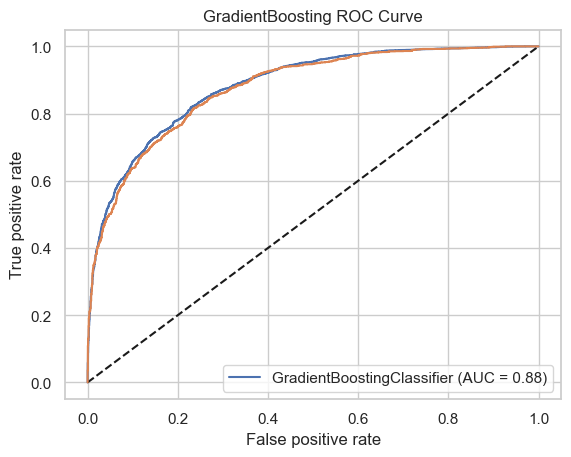

In [96]:
plt.figure(figsize=[6,4])
plot_roc_curve(GBc,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting ROC Curve')
plt.show()

###  Conclusion

In [97]:
import numpy as np
a=np.array(y_test)
Predicted=np.array(predGBc)
df_com=pd.DataFrame({'Original':a,'Predicted':Predicted},index=range(len(a)))
df_com

,Original,Predicted
0,1,0
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
3856,0,1
3857,0,0
3858,0,0
3859,1,1


So,there is a 89% chance of rain can fall on tommorow .

Where ever there will be rainfall, it will be more than 1 mm.

## Model Saving

In [98]:
import pickle
filename='Predicted_RainTomorrow.pkl'
pickle.dump(GBc,open(filename,'wb'))

Model saved